In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
sys.path.append('')

In [3]:
from classy import Class
from linear_theory import f_of_a
#from velocileptors.LPT.lpt_rsd_fftw import LPT_RSD

In [5]:
OmegaM, h, sigma8 = 0.31, 0.676, 0.8

omega_b = 0.022

lnAs =  3.047
ns = 0.96

nnu = 1
nur = 2.033
mnu = 0.06
omega_nu = 0.0106 * mnu
        
omega_c = (OmegaM - omega_b/h**2 - omega_nu/h**2) * h**2

pkparams = {
        'output': 'mPk',
        'P_k_max_h/Mpc': 20.,
        'z_pk': '0.0,10',
        'A_s': np.exp(lnAs)*1e-10,
        'n_s': ns,
        'h': h,
        'N_ur': nur,
        'N_ncdm': nnu,
        'm_ncdm': mnu,
        'tau_reio': 0.0568,
        'omega_b': omega_b,
        'omega_cdm': omega_c}

pkclass = Class()
pkclass.set(pkparams)
pkclass.compute()

In [10]:
# Calculate and renormalize power spectrum
ki = np.logspace(-3.0,1.0,200)
pi = np.array( [pkclass.pk_lin(k*h, 0 ) * h**3 for k in ki] )
pi = (sigma8/pkclass.sigma8())**2 * pi

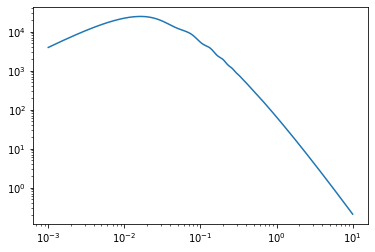

In [11]:
plt.loglog(ki, pi)

In [12]:
np.savetxt('boss_template_pk.txt', np.array([ki,pi]).T)

In [13]:
pkclass.sigma8_cb()

0.8127905447189346

In [14]:
pkclass.sigma8_cb()/pkclass.sigma8()

1.0043292285262921